<script>
  jQuery(document).ready(function($) {

  $(window).load(function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });

  });
</script>

<style type="text/css">
  div#preloader { position: fixed;
      left: 0;
      top: 0;
      z-index: 999;
      width: 100%;
      height: 100%;
      overflow: visible;
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center;
  }

</style>

<div id="preloader"></div>

<table width=60% >
    <tr style="background-color: white;">
        <td><img src='https://www.creativedestructionlab.com/wp-content/uploads/2018/05/xanadu.jpg'></td>
<!--         <td><img src='https://www.creativedestructionlab.com/wp-content/uploads/2016/10/creative-destruction-lab.png' ></td> -->
    </tr>
</table>

---

<img src='https://raw.githubusercontent.com/XanaduAI/strawberryfields/master/doc/_static/strawberry-fields-text.png'>

---

<br>

<center> <h1> Quantum teleportation </h1></center>

<div class="alert alert-info">
“A trick that quantum magicians use to produce phenomena that cannot be imitated by classical magicians.” - A. Peres
</div>

To get a feel for how Strawberry Fields works, let's walk through an example of quantum teleportation.


## Background info
Quantum teleportation is the reliable transfer of an unknown quantum state across spatially separated qubits or qumodes, through the use of a classical transmission channel and quantum entanglement. Considered a fundamental quantum information protocol, it has applications ranging from quantum communication to enabling distributed information processing in quantum computation.

In general, all quantum teleportation circuits work on the same basic principle. Two distant observers, Alice and Bob, share a maximally entangled quantum state (in discrete variables, any one of the four Bell states; or in CV, a maximally entangled state for a fixed energy), and have access to a classical communication channel. Alice, in possession of an unknown state which she wishes to transport to Bob, makes a joint measurement of the unknown state and her half of the entangled state, by projecting onto the Bell basis. By transmitting the results of her measurement to Bob, Bob is then able to transform his half of the entangled state to an accurate replica of the original unknown state, by performing a conditional phase flip (for qubits) or displacement (for qumodes).

## The teleportation circuit

<img src='https://strawberryfields.readthedocs.io/en/stable/_images/teleport.svg' width=90%>

$$\newcommand{ket}[1]{\left|#1\right\rangle}$$

* Here, qumodes $q_1$ and $q_2$ are initially prepared as highly squeezed vacuum states in momentum and position space respectively. We do this by highly squeezing these two qumodes in the phase space:

\begin{align}
&\ket{0}_x \approx S(2)\ket{0}\\
&\ket{0}_p \approx S(-2) \ket{0}
\end{align}


* They are then maximally entangled by a 50-50 beamsplitter. This is a beamsplitter with parameters $\theta=\pi/4$, $\phi=0$.



* These two qumodes are now spatially separated, with $\ket{q_1}$ held by Alice, and $\ket{q_2}$ held by Bob, with the two connected via the classical communication channels $c_0$ and $c_1$.


* To teleport her unknown state $\ket{\psi}$ to Bob, Alice now performs a projective measurement of her entire system onto the maximally entangled basis states. This is done by entangling $\ket{\psi}$ and $\ket{q_1}$ via another 50-50 beamsplitter, before performing two homodyne measurements, in the $x$ and $p$ quadratures respectively. The two resulting measurements are referred to as $m_1$ and $m_2$.


* The results of these measurements are then transmitted to Bob, who performs both a position displacement (conditional on the $x$ measurement) using a $X$ gate, and a momentum displacement (conditional on the $p$ measurement) using a $Z$ gate, to recover exactly the transmitted state $\ket{\psi}$. In particular, Bob has to make the following displacements:

\begin{align}
Z\left(-\sqrt{2}m_2\right)X\left(\sqrt{2}m_1\right)\ket{q_2}
\end{align}

## Importing Strawberry Fields

We import the Strawberry Fields, as well as all quantum operations, using the following commands:

In [2]:
import strawberryfields as sf
from strawberryfields.ops import *

The first import statement imports Strawberry Fields as sf, allowing us to access the engine and backends. The second import statement imports all available CV gates into the global namespace.

In addition, we will also need some utilities from the `utils` subpackage, a module containing Strawberry Fields utilities and extensions. Finally, we import $\pi$ and the square root from NumPy so that we can pass angle parameters to gates such as beamsplitters, and perform some custom classical processing.

In [3]:
from strawberryfields.utils import scale
from numpy import pi, sqrt


<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">**Available CV gates**</p>

Check out our <a href="https://strawberryfields.readthedocs.io/en/stable/op_conventions.html">documentation</a> to see the available CV gates, states, measurements, and other operations available in Strawberry Fields.
</div>


## Engine initialization

We can now initialise our chosen backend, engine, and quantum register, using the 
`sf.Engine()` function, which has the following syntax:

    eng, q = sf.Engine(num_subsystems)

where

* `num_subsystems` (*int*) is the number of modes we want to initialise in our quantum register

returning

* `eng` is the resulting engine; we use this engine object to manipulate our engine/circuit.
* `q` (*tuple*) contains the **qumodes** in our quantum circuit. They are accessed by indexing; for example `q[0]` for the first qumode, `q[1]` for the second qumode, etc.

<div class="alert alert-info" style="border: 0px; border-left: 3px solid #31708f; color: black; background-color: #d9edf7">
<p style="color: #31708f;">**Exercise**</p>

Initialise an engine below, using the correct number of modes for quantum teleportation as per the circuit above.

</div>

In [4]:
eng, q = sf.Engine(3)

## Circuit construction

Now that we have created the engine and qumodes, we can start to construct our circuit. In Strawberry Fields, circuit construction *always* occurs within a `with eng:` context. Inside this context, operations are applied using the syntax

```python3
with eng:
    Operation(arguments) | (sequence of qumodes)
```

For example, to apply prepare a squeezed state, followed by a beamsplitter, we can write

```python3
with eng:
    Squeezed(0.5) | q[0]
    BSgate(pi/4, 0) | (q[0], q[1])
```

Some operations in Strawberry Fields apply to one mode, and some apply to two. Be sure to check the documentation to double check the operation arguments, and to see how many qumodes they act on.

<div class="alert alert-info" style="border: 0px; border-left: 3px solid #31708f; color: black; background-color: #d9edf7">
<p style="color: #31708f;">**Exercise**</p>

The cell below corresponding to the teleportation circuit is partially complete. Using the above, and referring to the docs, fill in the cell below to finish constructing the teleportation circuit.
</div>



In [5]:
with eng:
    # prepare the initial states
    Coherent(1+0.5j) | q[0]  # This is the state we will teleport
    Sgate(-2) | q[1]
    Sgate(2) | q[2]
    
    # apply the gates
    BSgate(pi/4, 0) | (q[1], q[2])  # a 50-50 beamsplitter
    BSgate(pi/4, 0) | (q[0], q[1])  # a 50-50 beamsplitter
    
    # perform the homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]    
    
    # displacement gates conditioned on the measurements
    Xgate(scale(q[0], sqrt(2))) | q[2]
    Zgate(scale(q[1], sqrt(2))) | q[2]

A couple of things to note:

* **Operations must be applied in temporal order.** Different operation orderings can result in the same quantum circuit, providing the operations do not apply sequentially to the same mode.


* **Gates are standard Python objects, and can be treated as such.** In this case, since both beamsplitters use the same parameters, a single instance can be created and stored under variable BS.


* **The results of measured modes are passed to gates simply by passing the measured mode as an argument.** In order to perform additional classical processing to the measured mode, we can use the basic classical processing functions available in `strawberryfields.utils`; here we used the `scale()` function.


## Running the engine

Once the circuit is constructed, you can run the engine via the `eng.run()` method:

```python3
    state = eng.run(backend, return_state=True, modes=None, *args, **kwargs)
```

The eng.run method accepts the arguments

* `backend`: a string representing the Strawberry Fields backend we wish to use; we have the choice of two Fock basis backends, the NumPy based (`'fock'`) and Tensorflow (`'tf'`), and one Gaussian representation backend (`'gaussian'`).

    This is required the first time running the engine, but optional for subsequent runs - if not provided, the previously used backend will continue to be used.

and returns

* `state`: an object representing the quantum state after the circuit simulation.

    Depending on backend used, the state returned might be a BaseFockState, which represents the state using the Fock/number basis, or might be a BaseGaussianState, which represents the state using Gaussian representation, as a vector of means and a covariance matrix. Many methods are provided for state manipulation, see Quantum states API for more details.

For more details on the technical differences between the backends, see the [Backend API](https://strawberryfields.readthedocs.io/en/stable/code/backend.html) in the documentation.

### How do we choose a backend?


* **Fock backends** are backends which represent the quantum state and operations via the Fock basis. <br>These can represent all possible continuous-variable states and operations, but also introduce numerical error due to truncation of the Fock space, and can consume more memory.


* The **gaussian backend**, due to its ability to represent states and operations as gaussian objects/transforms in the phase space, can be less computationally intensive then the Fock backends. <br>However, it cannot represent non-gaussian operations and states (such as the cubic phase gate, fock measurements, and fock states, amongst others).</li>

In the Fock backends, due to the infinite Hilbert space, we must specify a **cutoff dimension**. For example, choosing `cutoff_dim=5`, a state $|\psi\rangle$ has approximation

$$|{\psi}\rangle = \sum_{n=0}^\infty c_n|{n}\rangle \approx\sum_{n=0}^{5-1} c_n|{n}\rangle$$

in our truncated Fock basis - i.e. all information of quantum amplitudes of Fock states $|n\rangle$, with $n\geq 5$, is discarded.

<div class="alert" style="border: 0px; border-left: 3px solid #F0AD4E; color: black; background-color: #FFF1E3">
<p style="color: #9B5831;">**Warning**</p>
To avoid significant numerical error when working with the Fock backend, we generally need to ensure that all initial states and gates we apply result in negligible amplitude in the Fock basis for Fock states $|{n}\rangle, ~~n\geq \texttt{cutoff_dim}$.
<br><br>

For example, to prepare a squeezed vacuum state in the $x$ quadrature with `cutoff_dim=10`, a squeezing factor of $r=1$ provides an acceptable approximation, since $\left|\left\langle{n}\middle|{\xi}\right\rangle\right|^2<0.02$ for $n\geq 10$.
</div>

<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">**Scaling**</p>
As we are performing a classical simualation of a quantum system, we still need to consider how the simulation scales. Using the Fock backends, memory usage and computational time will scale like $\sim D^N$, where $N$ is the number of modes and $D$ the cutoff dimension.
<br><br>
Ideally, we would like to choose a cutoff large enough that minimises truncation error, but small enough to reduce classical computational resources!
</div>


<div class="alert alert-info" style="border: 0px; border-left: 3px solid #31708f; color: black; background-color: #d9edf7">
<p style="color: #31708f;">**Exercise**</p>

Run the engine using the Gaussian or the Fock backend.

</div>

In [6]:
state = eng.run('fock', cutoff_dim=15)

## Results and visualization
Once the engine has been run, we can extract results of measurements and the quantum state from the circuit. Any measurements performed on a mode are stored in the mode attribute `val`:

In [7]:
q[0].val

-1.0993109931099312

In [8]:
q[1].val

-0.038300383003829097

The returned `state` object stores the resulting state of the circuit after the engine run, and also contains some convenient functions for state manipulation.

<div class="alert alert-info" style="border: 0px; border-left: 3px solid #31708f; color: black; background-color: #d9edf7">
<p style="color: #31708f;">**Exercise**</p>

Print the state object below to see some info about the state.

</div>

In [9]:
print(state)

<FockState: num_modes=3, cutoff=15, pure=False, hbar=2>


The actual state representation can also be returned; in the Fock backends, the state vector in the truncated Fock basis is available via `state.ket()`, while the density matrix is given by `state.dm()`. In the Gaussian backend, the vector of means and covariance matrix are accessible via `state.means()` and `state.cov()` respectively.

### Fock backend example
To return the density matrix representing the Fock state, we can use the method state.dm(). In this case, the density matrix has dimension

In [11]:
state.dm().shape

(15, 15, 15, 15, 15, 15)

Here, we use the convention that every pair of consecutive dimensions corresponds to a subsystem; i.e.,

$$\rho_{\underbrace{ij}_{q[0]}\underbrace{kl}_{q[1]}\underbrace{mn}_{q[2]}}$$

Thus we can calculate the reduced density matrix for mode `q[2]`, $\rho_2$:

In [ ]:
import numpy as np
rho2 = np.einsum('kkllij->ij', state.dm())
rho2.shape

<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">**Note**</p>
The Fock state also provides the method `reduced_dm()` for extracting the reduced density matrix automatically.
</div>

In [15]:
state.reduced_dm([2])

array([[  5.20017225e-01 -1.73472348e-17j,
          2.62001634e-01 -8.69150141e-02j,
          2.80055494e-01 +2.94986447e-02j,
          1.67123169e-01 -7.90550672e-02j,
          1.22974690e-01 +4.66482169e-03j,
          8.70370392e-02 -5.99165249e-02j,
          6.12599236e-02 -7.23598638e-04j,
          5.03755666e-02 -4.24049729e-02j,
          4.56986981e-02 +4.90277701e-03j,
          3.27242806e-02 -1.95025911e-02j,
          3.94015196e-02 +1.75404805e-02j,
          1.02001102e-02 +1.03391172e-02j,
          8.68933695e-03 +1.84366657e-02j,
         -1.62624603e-02 +1.79535624e-03j,
          2.02890892e-03 -1.94914994e-02j],
       [  2.62001634e-01 +8.69150141e-02j,
          1.46531831e-01 -3.90312782e-18j,
          1.36170724e-01 +6.16704962e-02j,
          9.74152648e-02 -1.18977678e-02j,
          6.11789861e-02 +2.29041217e-02j,
          5.38664697e-02 -1.56406395e-02j,
          3.09856883e-02 +9.87433272e-03j,
          3.24683660e-02 -1.29453002e-02j,
          

The diagonal values of the reduced density matrix contain the marginal Fock state probabilities $\left|\left\langle{i}\mid{\rho_2}\right\rangle\right|^2,~~ 0\leq i< cutoff$:

In [15]:
np.real_if_close(np.diag(state.reduced_dm([2])))

array([  3.30124234e-01,   3.66661916e-01,   2.02037477e-01,
         6.96202751e-02,   1.39445869e-02,   1.68472510e-03,
         3.31591938e-03,   5.00648663e-03,   1.49447948e-03,
         1.08845772e-04,   1.21982477e-03,   5.89777516e-04,
         1.06575755e-03,   1.65544901e-04,   5.62370962e-05])

This can also be returned via the state method `all_fock_probs`.

### Plotting the Wigner function

<div class="alert alert-info" style="border: 0px; border-left: 3px solid #31708f; color: black; background-color: #d9edf7">
<p style="color: #31708f;">**Exercise**</p>

Using the `state.wigner` function, plot the wigner function of the input state and the resulting teleported state.

</div>

In [17]:
import matplotlib.pyplot as plt

In [18]:
x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)

In [19]:
W = state.wigner(2, x, p)

In [21]:
W.shape

(100, 100)

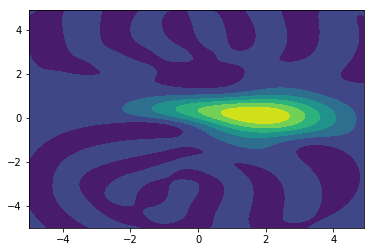

In [23]:
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

<div class="alert alert-info" style="border: 0px; border-left: 3px solid #31708f; color: black; background-color: #d9edf7">
<p style="color: #31708f;">**Exercise**</p>

Repeat this notebook, but using the `'gaussian'` backend instead. How does the teleportation fidelity compare to the fock backend?

</div>